In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [14]:
# Load Titanic dataset 
df = pd.read_csv('./breast-cancer-wisconsin.csv')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

Empty DataFrame
Columns: [Sample, F1, F2, F3, F4, F5, F6, F7, F8, F9, Class]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sample  699 non-null    int64 
 1   F1      699 non-null    int64 
 2   F2      699 non-null    int64 
 3   F3      699 non-null    int64 
 4   F4      699 non-null    int64 
 5   F5      699 non-null    int64 
 6   F6      699 non-null    object
 7   F7      699 non-null    int64 
 8   F8      699 non-null    int64 
 9   F9      699 non-null    int64 
 10  Class   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [13]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sample  699 non-null    int64
 1   F1      699 non-null    int64
 2   F2      699 non-null    int64
 3   F3      699 non-null    int64
 4   F4      699 non-null    int64
 5   F5      699 non-null    int64
 6   F7      699 non-null    int64
 7   F8      699 non-null    int64
 8   F9      699 non-null    int64
 9   Class   699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   F6      699 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


Class
False    683
True      16
Name: count, dtype: int64
Class
False    683
True      16
Name: count, dtype: int64
Class
False    97.711016
True      2.288984
Name: count, dtype: float64


,F6_10,F6_2,F6_3,F6_4,F6_5,F6_6,F6_7,F6_8,F6_9,Class
0,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


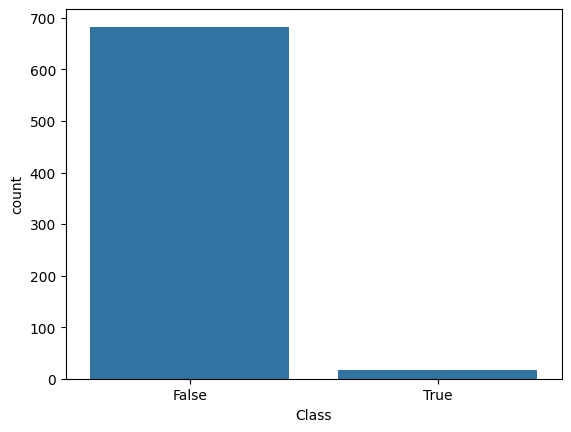

In [16]:
df_obj= pd.get_dummies(df_obj, drop_first=True)
df_obj = df_obj.rename(columns={'F6_?': 'Class'})

print(df_obj['Class'].value_counts())
print(df_obj['Class'].value_counts())
print( (df_obj['Class'].value_counts()/ df_obj['Class'].value_counts().sum()) * 100)
sns.countplot(data=df_obj, x='Class')
df_obj.head()

In [17]:
attr = df_obj.drop('Class', axis=1)
target = df_obj['Class']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.2, random_state=5)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=7)


In [19]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)
 

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

Accuracy= 0.9857142857142858
[[138   0]
 [  2   0]]
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       138
        True       0.00      0.00      0.00         2

    accuracy                           0.99       140
   macro avg       0.49      0.50      0.50       140
weighted avg       0.97      0.99      0.98       140



/home/bc/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/bc/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/bc/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Export the first three decision trees from the forest
## requires graphviz
# for i in range(3):
#     tree = rf.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)

In [21]:

# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")
 

Mean Decrease Accuracy[0.38308041 0.122525   0.10676906 0.08331698 0.11616165 0.02510676
 0.02726789 0.09295259 0.04281966]

Mean Decrease GINI= [0.01740333 0.00556631 0.00485051 0.00378509 0.00527722 0.0011406
 0.00123878 0.00422283 0.0019453 ]


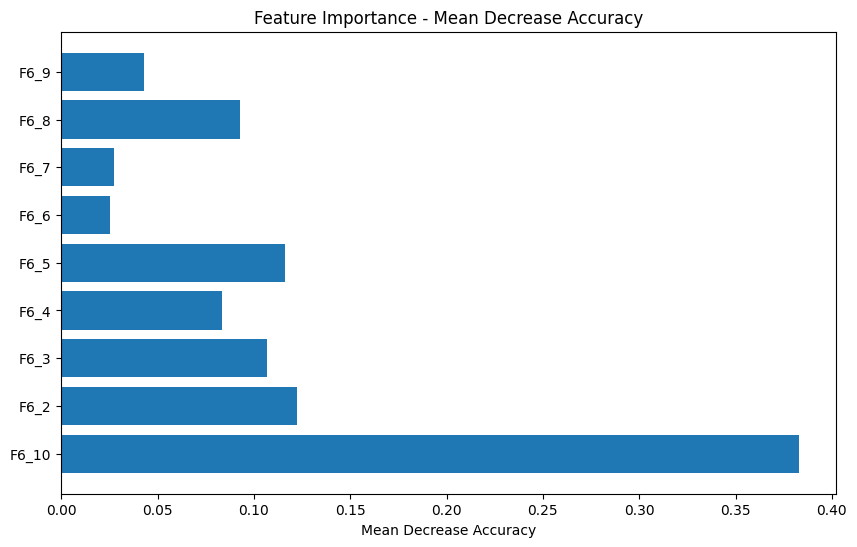

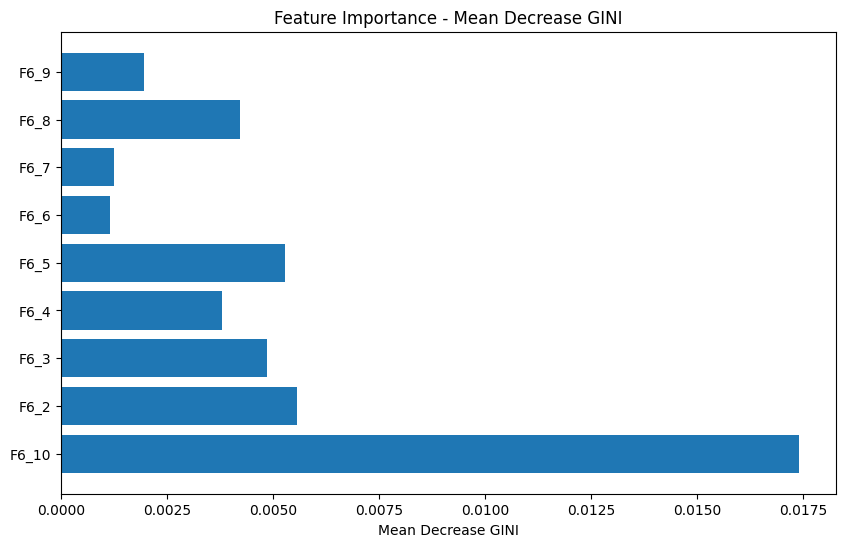

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [24]:

feature_scores = pd.Series(model.feature_importances_, index=attr_train.columns).sort_values(ascending=False)

print(feature_scores)

F6_10    0.383080
F6_2     0.122525
F6_5     0.116162
F6_3     0.106769
F6_8     0.092953
F6_4     0.083317
F6_9     0.042820
F6_7     0.027268
F6_6     0.025107
dtype: float64


Interperation: 

The F_1 Column contributes the most to the model's predictive accuracy since it has a higher mean decrease so it is more critical to maintain accuracy. We see the same thing in the **mean decrease gini** as it improves the purity of nodes in the decision trees within the model. Overall, F6_10 appears to be the dominant feature for both metrics, indicating it provides the most meaningful information in your model. Features like F6_5 and F6_8 also contribute but to a lesser extent, while features like F6_7 and F6_6 contribute the least.